# Crawling Emotional Words and show ratios in PieChart

In [1]:
# 필요한 라이브러리 불러오기
import warnings
warnings.filterwarnings(action='ignore')
from selenium import webdriver as wd
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import requests
import time
import random
import re
import pandas as pd
from konlpy.tag import Okt
okt = Okt()

In [2]:
import matplotlib.pyplot as plt

In [3]:
# 불용어 사전 불러오기
with open('stop_words.txt', 'r') as file:
    stop_word = file.readline()
    stop_word = str(stop_word)
    
stop_word = stop_word.replace("\ufeff", '').replace("'", '').replace(",", '').replace('\n', '').replace("’", '').replace("‘", '')
stop_words = stop_word.split()

In [4]:
# 곡 제목, 유튜브 링크가 있는 데이터 프레임(엑셀 파일)을 불러옴
data = pd.read_excel('/Users/lifeofpy/WebCrwaling/Melon/melon_with_comments.xlsx')
data

,Song Title,Site Link,Emotional Words
0,미쳐,https://www.melon.com/song/detail.htm?songId=5...,NaN
1,Badboy,https://www.melon.com/song/detail.htm?songId=3...,NaN
2,HIP,https://www.melon.com/song/detail.htm?songId=3...,NaN
3,DUN DUN,https://www.melon.com/song/detail.htm?songId=3...,NaN
4,How You Like That,https://www.melon.com/song/detail.htm?songId=3...,NaN
5,TT,https://www.melon.com/song/detail.htm?songId=3...,NaN
6,뿜뿜,https://www.melon.com/song/detail.htm?songId=3...,NaN
7,롤린,https://www.melon.com/song/detail.htm?songId=3...,NaN
8,Alcohol-Free,https://www.melon.com/song/detail.htm?songId=3...,NaN
9,DunDun Dance,https://www.melon.com/song/detail.htm?songId=3...,NaN


In [5]:
data['Emotional Words'][0]  # 비어있는 nan 값의 Emotional Words 열을 감정 단어로 채우자!

nan

In [6]:
data_lst = data['Site Link'].tolist() # Series to List
data_lst

['https://www.melon.com/song/detail.htm?songId=5584641',
 'https://www.melon.com/song/detail.htm?songId=30864993',
 'https://www.melon.com/song/detail.htm?songId=32175937',
 'https://www.melon.com/song/detail.htm?songId=32351853',
 'https://www.melon.com/song/detail.htm?songId=32720013',
 'https://www.melon.com/song/detail.htm?songId=30054344',
 'https://www.melon.com/song/detail.htm?songId=30816860',
 'https://www.melon.com/song/detail.htm?songId=30287019',
 'https://www.melon.com/song/detail.htm?songId=33559180',
 'https://www.melon.com/song/detail.htm?songId=33464805',
 'https://www.melon.com/song/detail.htm?songId=30568338',
 'https://www.melon.com/song/detail.htm?songId=31492319',
 'https://www.melon.com/song/detail.htm?songId=32872978',
 'https://www.melon.com/song/detail.htm?songId=32393669']

In [7]:
driver = wd.Chrome(executable_path='/Users/lifeofpy/Desktop/chromedriver')

In [9]:
# 감정 단어 카운트
emotional_words = 0

# 모든 단어 카운트
all_words = 0


# 형용사 태그만 담을 리스트 정의
adj = []


# 단어-품사 태그 쌍을 담을 리스트 okt 생성
okts = []

In [10]:
for k in range(len(data)):
    
    # 댓글 페이지 개수 구하기
    driver = wd.Chrome(executable_path='/Users/lifeofpy/Desktop/chromedriver')
    page_url = data_lst[k] # url 에 페이지 링크를 하나씩 담아준다
    driver.get(page_url)
    comments = []
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    pages = soup.find_all('span', {'class': 'd_cmtpgn_srch_cnt'})[0]

    # 일단 추출된 태그를 문자열로 바꾸기
    pages = str(pages)

    # 정규식을 통해 태그에서 숫자(=댓글 개수)만 추출하기
    cmt_num = re.findall('\d+', pages)
    page_num = "".join(cmt_num)
    page_num = int(page_num)
    page_num = page_num//10
        
    # 댓글 페이지마다 바뀔 url 생성
    url = page_url + '#cmtpgn=&pageNo={}&sortType=0&srchType=2&srchWord='
    
    
    for i in range(0, page_num+1):
        link = url.format(i) # {} 안에 들어갈 문자열 포매팅
        driver.get(link)
        driver.implicitly_wait(2)

        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        comment = soup.find_all('div', {'class': 'd_cmtpgn_cmt_full_contents'})

        for r in comment:
            comments.append(r.get_text().strip())
    
    
    melon_comments = []
    melon_comments = comments
    
    # 댓글이 모인 comments 리스트에서 필요없는 문자 처리하기
    for j in range(len(melon_comments)):
        if '내용' in melon_comments[j]:
            melon_comments[j] = melon_comments[j].replace('내용', '')

    
    for i in range(len(melon_comments)):
        okts.append(okt.pos(melon_comments[i]))
    
    # '감정 단어'의 품사는 '형용사'이므로 형용사 태그만 adj 리스트에 담기

    for i in range(len(okts)):
        for j in range(len(okts[i])):
            if okts[i][j][1] == 'Adjective' and len(okts[i][j][0]) > 1:
                adj.append(okts[i][j][0])

전체 댓글을 기준으로 adj 리스트에 있는 모든 댓글에 있는 형용사 중에서 감정 단어인 것과 감정 단어가 아닌 것을 분류하면 됨.

In [11]:
# 불용어 제외하고 real_adj 에 담기
for w in adj:
    if w not in stop_words:
        emotional_words += 1

In [12]:
emotional_words

162681

In [13]:
for i in range(len(okts)):
    for j in range(len(okts[i])):
        all_words += 1

In [14]:
non_emotional_words = all_words - emotional_words

In [15]:
non_emotional_words

884874

In [24]:
all_words

1047555

### 댓글에 드러난 감정 단어 비율 파이 차트로 나타내기

In [16]:
import seaborn as sns

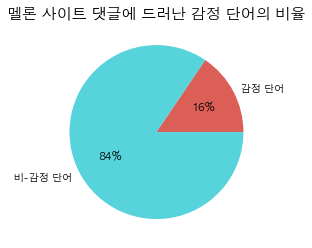

In [23]:
ratio = [emotional_words, non_emotional_words]
labels = ['감정 단어', '비-감정 단어']

# 컬러 팔레트 사용
colors = sns.color_palette('hls',len(labels))
plt.rcParams['font.family'] = 'AppleGothic'
plt.pie(ratio, labels=labels, autopct='%1.f%%', colors=colors)
plt.title('멜론 사이트 댓글에 드러난 감정 단어의 비율', fontsize=15)
plt.show()